# Title of ML project : Telangana Regional Transport Authority Vehicle Online Sales Data 01-01-2025 to 31-01-2025

# Name : Renjitha E R

# Organization : Entri Elevate

https://etimg.etb2bimg.com/photo/86419624.cms

# Overview of Problem Statement

In 2025, a significant number of vehicles will require insurance renewal. The goal of this project is to predict the number of vehicles that need insurance renewal in 2025 using machine learning techniques. This prediction is crucial for insurance companies, government agencies, and vehicle owners to plan ahead, allocate resources efficiently, and ensure seamless insurance renewal processes.

# Objective

Predicting the number of vehicles that need insurance renewal in 2025

# Data Description

Source Of Data: The dataset collected from Telengana Government Site

# Feature

slno                   :	Serial number of the record.
modelDesc              :	Description of the vehicle model.
fuel                   :	Type of fuel used (e.g., Petrol, Diesel, Electric).
colour                 :	Vehicle color.
vehicleClass           :	Category of the vehicle (e.g., Motor Cycle, Goods Carriage).
makeYear               :	The manufacturing year of the vehicle.
seatCapacity           :	Number of seats in the vehicle.
insuranceValidity      :	The expiry date of the vehicle's insurance.
secondVehicle          :	Indicates whether this is the owner's second vehicle (Y or N).
tempRegistrationNumber :	Temporary registration number of the vehicle.
category               :	Specifies if the vehicle is Transport or Non-Transport.
makerName              : 	Name of the vehicle manufacturer (e.g., Honda, Bajaj, Ashok Leyland).
OfficeCd               :	Code of the registering office (RTO).
fromdate               :	Registration start date.
to date                :	Registration end date.

# Data Collection

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

In [2]:
# Load the dataset
df =pd.read_csv('ts_transport_online_sales_01_01_2025to31_01_2025.csv')

In [3]:
df.head(5)

,slno,modelDesc,fuel,colour,vehicleClass,makeYear,seatCapacity,insuranceValidity,secondVehicle,tempRegistrationNumber,category,makerName,OfficeCd,fromdate,todate
0,1,TVS JUPITER 113 BSVI-PH2,PETROL,GL COPPER,MOTOR CYCLE,01/12/2024,2,31/12/2029,N,TG09QTR2266,Non Transport,TVS MOTOR COMPANY LTD,RTA-HYDERABAD-WZ,01/01/2025,01/01/2025
1,2,KTM - 250 DUKE BSVI-PH2,PETROL,EBONY BLACK(MET),MOTOR CYCLE,01/12/2024,2,31/12/2029,N,TG07LTR7586,Non Transport,BAJAJ AUTO LTD,RTA RANGAREDDY,01/01/2025,01/01/2025
2,3,SHINE 125 DRUM BSVI-PH2,PETROL,REBEL RED METALLIC 2,MOTOR CYCLE,01/11/2024,2,31/12/2029,N,TG08KTR6798,Non Transport,HONDA MOTORCYCLE&SCOOTER(I)P L,RTA-HYDERABAD-NZ,01/01/2025,01/01/2025
3,4,UE2825/39 T TIP BGS 16 CU M 295/90R20 BSVI-PH2,DIESEL,YELLOW CABIN AND GRAY LOAD BODY,Goods Carriage,01/11/2024,2,31/12/2025,N,TG10GTR2075,Transport,ASHOK LEYLAND LTD,RTA MEDCHAL,01/01/2025,01/01/2025
4,5,SHINE 125 DISK BSVI-PH2,PETROL,BLACK,MOTOR CYCLE,01/12/2024,2,30/12/2029,N,TG08KTR6920,Non Transport,HONDA MOTORCYCLE&SCOOTER(I)P L,UNIT OFFICE PATANCHERUVU,01/01/2025,01/01/2025


In [7]:
df.tail(5)

,slno,modelDesc,fuel,colour,vehicleClass,makeYear,seatCapacity,insuranceValidity,secondVehicle,tempRegistrationNumber,category,makerName,OfficeCd,fromdate,todate
70428,70429,AMAZE 3RD GEN ZX MT(I-VTEC) BSVI-PH2,PETROL,PLATINUM WHITE,MOTOR CAR,01/01/2025,5,30/01/2028,N,TG08LTR4594,Non Transport,HONDA CARS INDIA LTD,RTA MEDCHAL,31/01/2025,31/01/2025
70429,70430,INNOVA HYCROSS HYBRID ZX(7S) BSVI-PH2,PETROL,SUPER WHITE,MOTOR CAR,01/01/2025,7,30/01/2028,N,TG07MTR6426,Non Transport,TOYOTA KIRLOSKAR MOTOR PVT LTD,RTA UPPAL,31/01/2025,31/01/2025
70430,70431,ACTIVA 125 SMART. BSVI-PH2,PETROL,P BLACK,MOTOR CYCLE,01/01/2025,2,30/01/2030,Y,TG09RTR4579,Non Transport,HONDA MOTORCYCLE&SCOOTER(I)P L,RTA-HYDERABAD-EZ,31/01/2025,31/01/2025
70431,70432,PASSION + I 3S DRS BSVI-PH2,PETROL,BLACK GREY STRIPES,MOTOR CYCLE,01/07/2024,2,30/01/2030,N,TG09RTR4549,Non Transport,HERO MOTOCORP LTD,RTA RANGAREDDY,31/01/2025,31/01/2025
70432,70433,MARUTI XL6 SMART HYBRID ALPHA 1.5L5MT BSVI-PH2,PETROL,SPLENDID SILVER,MOTOR CAR,01/02/2024,6,30/01/2028,N,TG09RTR4413,Non Transport,"MARUTI SUZUKI INDIA LTD.,",RTA MEDCHAL,31/01/2025,31/01/2025


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70433 entries, 0 to 70432
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   slno                    70433 non-null  int64 
 1   modelDesc               70433 non-null  object
 2   fuel                    69285 non-null  object
 3   colour                  70368 non-null  object
 4   vehicleClass            70433 non-null  object
 5   makeYear                70433 non-null  object
 6   seatCapacity            70433 non-null  int64 
 7   insuranceValidity       70391 non-null  object
 8   secondVehicle           70433 non-null  object
 9   tempRegistrationNumber  70433 non-null  object
 10  category                70433 non-null  object
 11  makerName               70433 non-null  object
 12  OfficeCd                70433 non-null  object
 13  fromdate                70433 non-null  object
 14  todate                  70433 non-null  object
dtypes:

In [11]:
df.describe()

,slno,seatCapacity
count,70433.000000,70433.000000
mean,35217.000000,2.608280
std,20332.400092,2.310843
min,1.000000,0.000000
25%,17609.000000,2.000000
50%,35217.000000,2.000000
75%,52825.000000,2.000000
max,70433.000000,60.000000


In [13]:
df.shape

(70433, 15)

In [15]:
df.drop(columns=['fuel', 'colour', 'seatCapacity'], inplace=True)

In [17]:
df.shape

(70433, 12)

# Data Preprocessing - Data Cleaning

In [19]:
# Convert 'insuranceValidity' to datetime
df['insuranceValidity'] = pd.to_datetime(df['insuranceValidity'],errors='coerce')

In [21]:
# Extract the year of insurance validity
df['insuranceYear'] = df['insuranceValidity'].dt.year

In [23]:
print(df)

        slno                                        modelDesc    vehicleClass  \
0          1                         TVS JUPITER 113 BSVI-PH2     MOTOR CYCLE   
1          2                          KTM - 250 DUKE BSVI-PH2     MOTOR CYCLE   
2          3                          SHINE 125 DRUM BSVI-PH2     MOTOR CYCLE   
3          4  UE2825/39 T TIP BGS 16 CU M  295/90R20 BSVI-PH2  Goods Carriage   
4          5                          SHINE 125 DISK BSVI-PH2     MOTOR CYCLE   
...      ...                                              ...             ...   
70428  70429             AMAZE 3RD GEN ZX MT(I-VTEC) BSVI-PH2       MOTOR CAR   
70429  70430            INNOVA HYCROSS HYBRID ZX(7S) BSVI-PH2       MOTOR CAR   
70430  70431                       ACTIVA 125 SMART. BSVI-PH2     MOTOR CYCLE   
70431  70432                      PASSION + I 3S DRS BSVI-PH2     MOTOR CYCLE   
70432  70433   MARUTI XL6 SMART HYBRID ALPHA 1.5L5MT BSVI-PH2       MOTOR CAR   

         makeYear insurance

In [25]:
# Count vehicles needing renewal in 2025
renewals_2025 = df[df['insuranceYear'] == 2025].shape[0]
print("Number of vehicles needing renewal in 2025:", renewals_2025)

Number of vehicles needing renewal in 2025: 941


In [27]:
df.isnull().sum()

slno                       0
modelDesc                  0
vehicleClass               0
makeYear                   0
insuranceValidity         44
secondVehicle              0
tempRegistrationNumber     0
category                   0
makerName                  0
OfficeCd                   0
fromdate                   0
todate                     0
insuranceYear             44
dtype: int64

In [29]:
df = df.dropna(subset=['insuranceValidity'])

In [31]:
df.isnull().sum()

slno                      0
modelDesc                 0
vehicleClass              0
makeYear                  0
insuranceValidity         0
secondVehicle             0
tempRegistrationNumber    0
category                  0
makerName                 0
OfficeCd                  0
fromdate                  0
todate                    0
insuranceYear             0
dtype: int64

In [33]:
df.duplicated().sum()

0

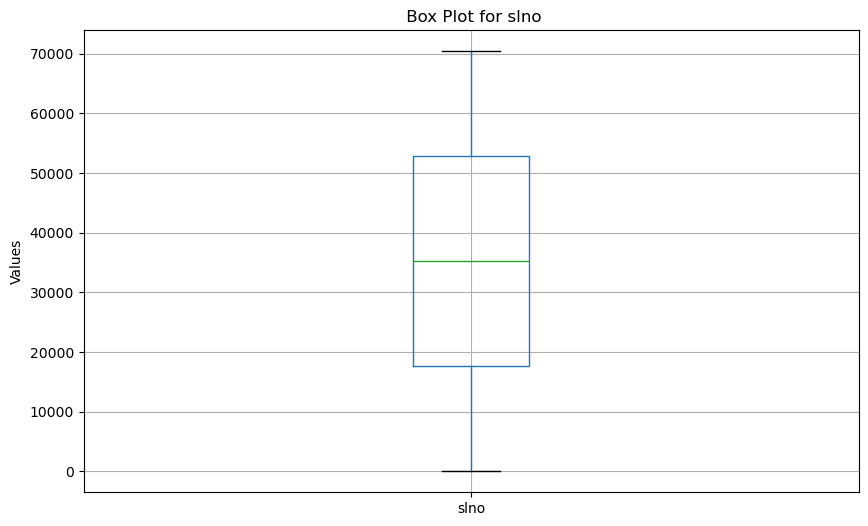

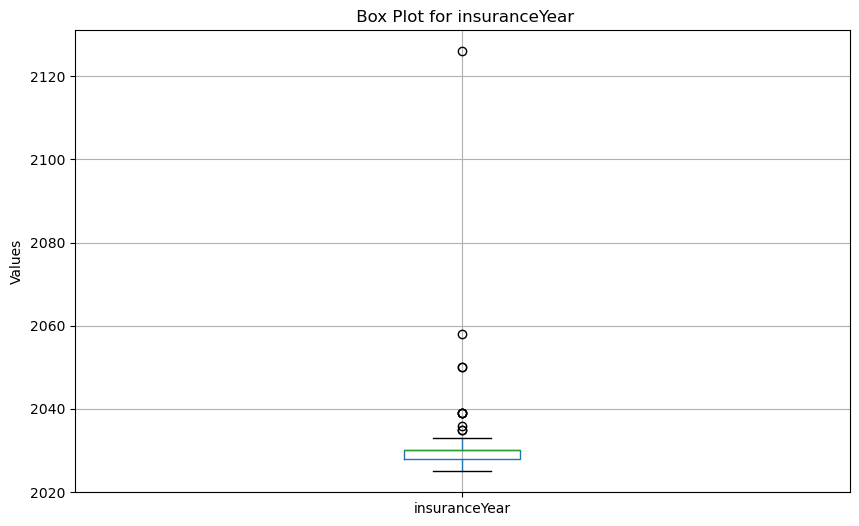

In [35]:
# Box Plot for visualize outliers
columns = df.select_dtypes(include = ['number'])

for col in columns.columns:
    plt.figure(figsize=(10,6))
    columns.boxplot(column = col)
    plt.title(f" Box Plot for {col}")
    plt.ylabel('Values')
    plt.show()

In [37]:
# Outlier's removel with IQR
def handle_outlier(df):
    for col in df.select_dtypes(include = ['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        lower = Q1 - 1.5 *IQR
        upper = Q3 + 1.5 *IQR

        df[col] = df[col].apply(lambda x: 
        lower if x<lower else 
        upper if x>upper else
        x)
    return df
df1 = handle_outlier(df)

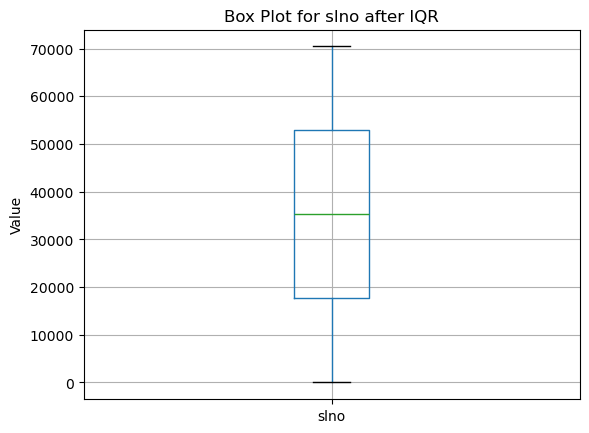

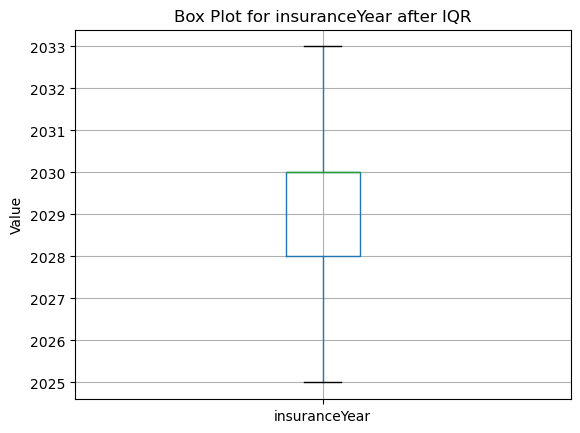

In [39]:
# Box-Plot after removing outliers
column = df1.select_dtypes(include=['int64','float64'])

for col in column.columns:
    plt.figure()
    column.boxplot(column = col)
    plt.title(f"Box Plot for {col} after IQR")
    plt.ylabel('Value')
    plt.show()

# Exploratory Data Analysis (EDA)

In [41]:
print(df.columns)

Index(['slno', 'modelDesc', 'vehicleClass', 'makeYear', 'insuranceValidity',
       'secondVehicle', 'tempRegistrationNumber', 'category', 'makerName',
       'OfficeCd', 'fromdate', 'todate', 'insuranceYear'],
      dtype='object')


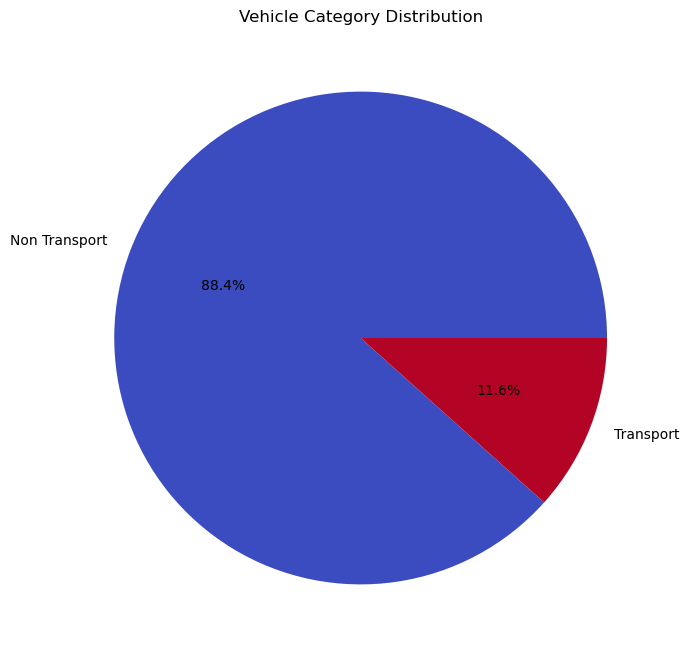

In [43]:
# Pie Chart - Distribution of vehicle categories
plt.figure(figsize=(8, 8))
df['category'].value_counts().plot.pie(autopct='%1.1f%%', cmap='coolwarm')
plt.title("Vehicle Category Distribution")
plt.ylabel("")
plt.show()

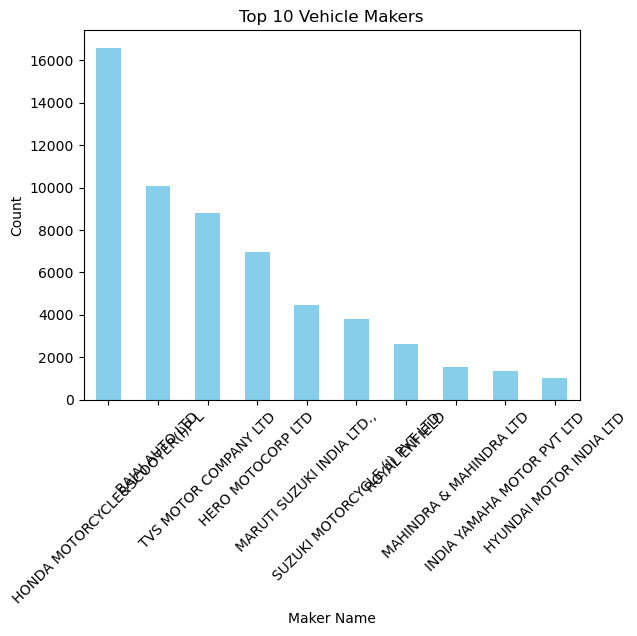

In [45]:
# Bar Plot - Top 10 vehicle makers
top_makers = df['makerName'].value_counts().head(10)
top_makers.plot(kind='bar', color='skyblue')
plt.title("Top 10 Vehicle Makers")
plt.xlabel("Maker Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

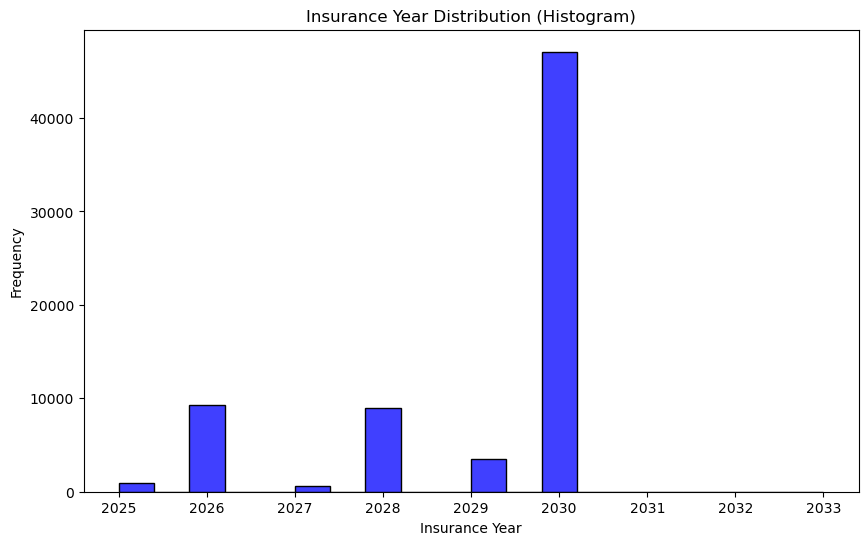

In [47]:
# Histogram for Insurance Year Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['insuranceYear'].dropna(), bins=20, kde=False, color='blue')
plt.title("Insurance Year Distribution (Histogram)")
plt.xlabel("Insurance Year")
plt.ylabel("Frequency")
plt.show()

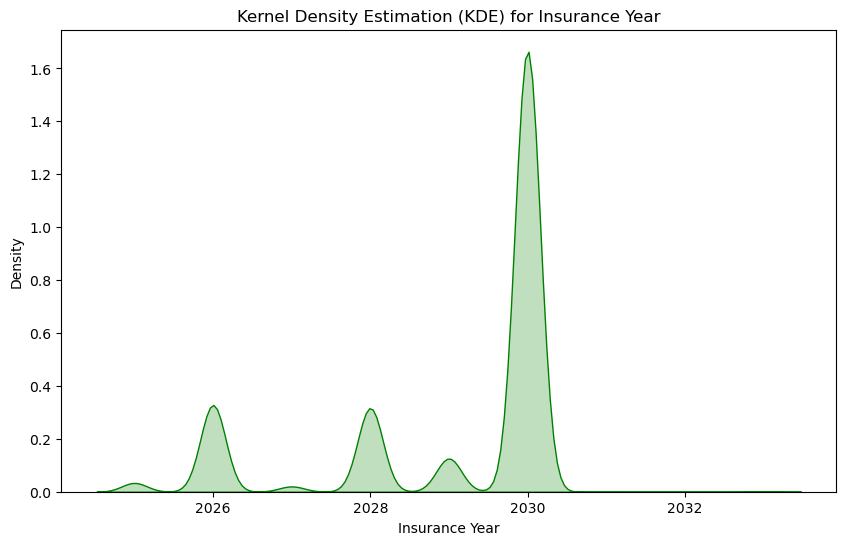

In [49]:
# Kernel Density Estimation (KDE) for Insurance Year
plt.figure(figsize=(10, 6))
sns.kdeplot(df['insuranceYear'].dropna(), fill=True, color='green')
plt.title("Kernel Density Estimation (KDE) for Insurance Year")
plt.xlabel("Insurance Year")
plt.ylabel("Density")
plt.show()

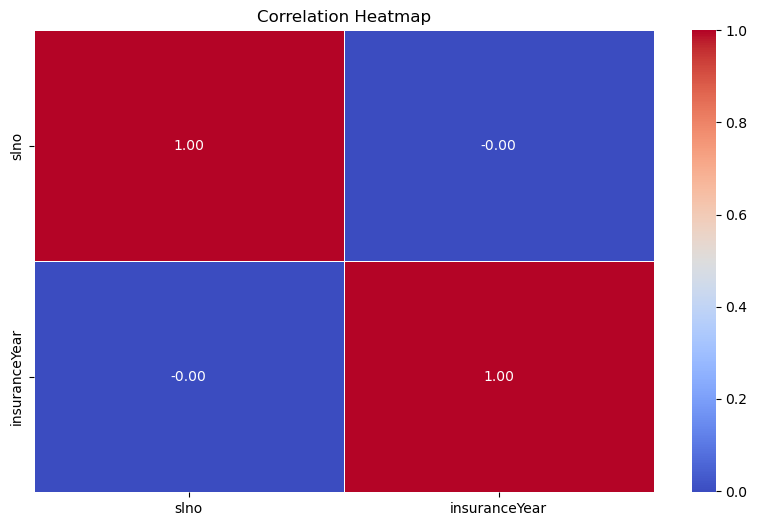

In [51]:
# Generate heatmap for numerical columns only
numerical_df = df.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Feature Selection

In [55]:
# Splitting the dataset into training and testing sets
X = df1.drop('insuranceYear', axis=1)
y = df1['insuranceYear']

In [116]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['vehicleClass', 'secondVehicle', 'category', 'OfficeCd', 'fromdate', 'todate', 'makerName', 'modelDesc', 'makeYear', 'tempRegistrationNumber']  # List your categorical columns

# Apply Label Encoding to each categorical column
encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = encoder.fit_transform(X[col])

# Check transformed data
print(X.head())

   slno  modelDesc  vehicleClass  makeYear insuranceValidity  secondVehicle  \
0     1       2078            10        53        2029-12-31              0   
1     2       1102            10        53        2029-12-31              0   
2     3       1709            10        49        2029-12-31              0   
3     4       2121             7        49        2025-12-31              0   
4     5       1708            10        53        2029-12-30              0   

   tempRegistrationNumber  category  makerName  OfficeCd  fromdate  todate  
0                   31983         0        351        38         0       0  
1                   15337         0          7        25         0       0  
2                   24060         0         46        36         0       0  
3                   43914         1          4        16         0       0  
4                   24151         0         46        49         0       0  


In [120]:
# Convert datetime columns to numerical values
def preprocess_data(X):
    for col in X.select_dtypes(include=['datetime64']):  # Identify datetime columns
        X[col] = X[col].astype('int64') // 10**9  # Convert to Unix timestamp (seconds)
    return X

# Function to select best K features for regression
def select_best_features(X, y, K=10):
    X = preprocess_data(X)  # Convert datetime columns
    selector = SelectKBest(score_func=f_regression, k=K)  # Use f_regression for regression problems
    X_new = selector.fit_transform(X, y)  # Apply feature selection
    
    # Get feature scores
    feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
    feature_scores = feature_scores.sort_values(by='Score', ascending=False)
    
    print("Top Selected Features:\n", feature_scores.head(K))  # Print selected features
    
    return X_new, feature_scores  # Return both selected features and scores

# Set K (number of top features to select)
K = 10

# Preprocess and Apply feature selection
X = preprocess_data(X)
X_selected, feature_scores = select_best_features(X, y, K)

# Print all feature scores (optional)
print("\nAll Feature Scores:\n", feature_scores)

Top Selected Features:
                   Feature          Score
4       insuranceValidity  733508.288134
7                category   89743.466572
2            vehicleClass    3239.128581
1               modelDesc    1693.067296
5           secondVehicle     746.316676
9                OfficeCd     640.506751
8               makerName     569.728503
3                makeYear      15.335822
6  tempRegistrationNumber       6.509149
0                    slno       0.506007

All Feature Scores:
                    Feature          Score
4        insuranceValidity  733508.288134
7                 category   89743.466572
2             vehicleClass    3239.128581
1                modelDesc    1693.067296
5            secondVehicle     746.316676
9                 OfficeCd     640.506751
8                makerName     569.728503
3                 makeYear      15.335822
6   tempRegistrationNumber       6.509149
0                     slno       0.506007
10                fromdate       0.108697

# Split Data into Training and Testing Sets

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Check the shapes of the resulting datasets
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Training target set shape:", y_train.shape)
print("Testing target set shape:", y_test.shape)

Training feature set shape: (56311, 12)
Testing feature set shape: (14078, 12)
Training target set shape: (56311,)
Testing target set shape: (14078,)


# Feature Scaling

In [126]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

# Build the ML Model

In [148]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [154]:
models = {
    '1. Linear Regression' : LinearRegression(),
    '2. Decision Tree Regressor' : DecisionTreeRegressor(),
    '3. Random Forest Regressor' : RandomForestRegressor(),
    '4. Gradient Boosting Regressor' : GradientBoostingRegressor(),
    '5. Support Vector Regressor' : SVR(),
    '6. Lasso Regression' : Lasso(),
    '7. AdaBoost Regressor' : AdaBoostRegressor()
}

# Model Evaluation

In [156]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R² Score': r2, 'RMSE': rmse}

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                                     MSE       MAE  R² Score      RMSE
1. Linear Regression            0.083106  0.198923  0.962266  0.288281
2. Decision Tree Regressor      0.241298  0.241298  0.890439  0.491221
3. Random Forest Regressor      0.241300  0.241309  0.890438  0.491223
4. Gradient Boosting Regressor  0.241260  0.241299  0.890456  0.491183
5. Support Vector Regressor     0.050574  0.113905  0.977037  0.224887
6. Lasso Regression             1.159420  0.906659  0.473566  1.076764
7. AdaBoost Regressor           0.241298  0.241298  0.890439  0.491221


In [160]:
# Finding The Best Model
best_model = results_df['R² Score'].idxmax()
print(f'The best Model based on R2 Score is:\n {best_model}')
print(results_df.loc[best_model])

The best Model based on R2 Score is:
 5. Support Vector Regressor
MSE         0.050574
MAE         0.113905
R² Score    0.977037
RMSE        0.224887
Name: 5. Support Vector Regressor, dtype: float64


# Hyperparameter Tuning

In [169]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10,],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [171]:
# Initialize the Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error',verbose =1, n_jobs=-1)

In [173]:
# Fit the Grid Search to the data
grid_search.fit(X_train_scaled, y_train)

best_param = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best parameters and score
print(f"Best Parameters: {best_param}")
print(f"Best Cross-Validation MSE Score: {-best_score}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation MSE Score: 0.002013518108838934


In [175]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Printing the results
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")

Test MSE: 0.18793357096845414
Test MAE: 0.18793357096845414
Test R2: 0.9146688529626364
Test RMSE: 0.4335130574370905


In [177]:
# Evaluating Model Performance with Residual Analysis

# Predicting values  
y_train_pred = best_model.predict(X_train_scaled)  
residuals = y_train - y_train_pred

In [179]:
# Cross-validate the model  
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')  
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

Cross-Validation MSE: 0.002013518108838934


# Pipeline Creation

In [184]:
# spliting data into X and y
X = df1.drop(['insuranceYear'], axis=1)
y = df1['insuranceYear']

In [186]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
from sklearn.compose import ColumnTransformer

# Separate numeric and non-numeric columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Final pipeline with the regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=50,              # Best number of estimators from GridSearchCV
        min_samples_split=5,          # Best min_samples_split from GridSearchCV
        min_samples_leaf=2,           # Best min_samples_leaf from GridSearchCV
        max_depth=10,                 # Best max_depth from GridSearchCV
        random_state=42))])           # Ensure reproducibility

# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['slno'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['modelDesc', 'vehicleClass', 'makeYear', 'secondVehicle',
       'tempRegistrationNumber', 'category', 'makerName', 'OfficeCd',
       'fromdate', 'todate'],
      dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                       min_samples_split=5, n_estimators=50,
                                       random_state=42))])

# Saving the Model

In [191]:
# Save the entire pipeline
joblib.dump(pipeline,'random_forest_pipeline.joblib')

['random_forest_pipeline.joblib']

In [193]:
loaded_pipeline = joblib.load('random_forest_pipeline.joblib')